In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.patches as patches

# Using Monte carlo algorithm to calculate $\pi$

(-1.1, 1.1)

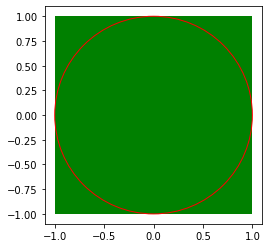

In [17]:
#visulaization
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)
square = patches.Rectangle((-1,-1),2,2, facecolor='green')
ax.add_patch(square)

circle = patches.Circle((0,0),1, facecolor='none', edgecolor='red')
ax.add_patch(circle)

plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

## Comparing the areas

Area of the circle: $ A_\mathrm{circle} = \pi r^2 = \pi $

Area of the square: $ A_\mathrm{square} = a^2 = 4  $

$ \therefore \pi = 4\frac{A_\mathrm{circle}}{A_\mathrm{square}} $ 

### Method 1: measure the area ratio by counting randomly generated points

In [57]:
#define the number of points:
points=100000
rand=2*np.random.rand(2*points)-1
randomPoints=rand.reshape(points,2)
#we need 2 dimensional points(x and y) in range of -1,1

In [58]:
#we will use the norm sqaured to decide wethere a point is inside or outside the circle.
#if the norm squared is bigger than the radius squared, then it's outside, otherwise, it's inside.
#(we could have use the norm, by taking the square root of course, but this isn't necessary
# and it will consume time only)
normSquared=randomPoints[:,0]**2 + randomPoints[:,1]**2

In [59]:
pointsOut=randomPoints[normSquared>1]
pointsIn=randomPoints[normSquared<=1]

In [60]:
piMethod1=4*(len(pointsIn)/points)
piMethod1

3.1414

In [61]:
erroMethod1=np.pi-piMethod1
erroMethod1

0.00019265358979314584

(-1.1, 1.1)

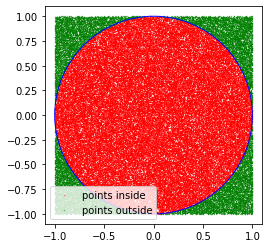

In [65]:
#visulaization
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.set_aspect(1)

circle = patches.Circle((0,0),1, facecolor='none', edgecolor='blue')
ax.add_patch(circle)

plt.scatter(pointsIn[:,0],pointsIn[:,1],color='red',label='points inside',s=0.05)
plt.scatter(pointsOut[:,0],pointsOut[:,1],color='green',label='points outside',s=0.05)
plt.legend()
plt.xlim([-1.1,1.1])
plt.ylim([-1.1,1.1])

### Method2: loop method

In [72]:
# slower but easier to implement.
inPoints=0
radius=1
for i in range(points):
    if(np.linalg.norm(2*np.random.rand(2)-1) <= radius):
        inPoints=inPoints+1

In [74]:
piMethod2=4*inPoints/points
piMethod2

3.1442

In [75]:
erroMethod2=np.pi-piMethod2
erroMethod2

-0.00260734641020699

## Speed comparison

* Method 1

In [78]:
%%timeit
rand=2*np.random.rand(2*points)-1
randomPoints=rand.reshape(points,2)
normSquared=randomPoints[:,0]**2 + randomPoints[:,1]**2
pointsIn=randomPoints[normSquared<=1]
piMethod1=4*(len(pointsIn)/points)

4.16 ms ± 363 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


* Method 2

In [79]:
%%timeit
inPoints=0
radius=1
for i in range(points):
    if(np.linalg.norm(2*np.random.rand(2)-1) <= radius):
        inPoints=inPoints+1
piMethod2=4*inPoints/points

1.12 s ± 42.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
